# <center>Data Mining Project Code</center>

** **
## <center>*02 - XXXXXXXX*</center>

** **

Consumers today are becoming more selective about where they buy their products and where they spend their money. Consequently, it is essencial for companies to better understand their clients, being able to tailor sales and discounts to certain groups of customers.

Knowing this, the goal of this project is to divide customers of `ABCDEats Inc.` into smaller groups, whose clients have similar characteristics and purchasing behaviours.

The second  notebook of this project consists of the .......

This project was presented to the `TargetSphere Advisors`, a group of Consultants, Business Analysts and Data Scientists who focus on delivering Customer Segementation solutions for small and medium-sized businesses.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
2. [Data Cleansing](#2.-Data-Cleansing) <br><br>
    2.1 [Filling the missing values](#2.1-Filling-the-missing-values) <br><br>
    2.2 [Outlier Treatment](#2.2-Outlier-Treatment)


 

# 1. Importing Libraries & Data

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_name = 'preprocessed_data'

data = pd.read_csv(f'data/{dataset_name}.csv', index_col = "customer_id")
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,avg_order_hour,total_spend,avg_spend_prod,is_repeat_customer,weekend_orders,weekday_orders,1_7h,8_14h,15_19h,20_23h
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0,1,DELIVERY,DIGI,0.00,...,18.0,28.88,5.776,1,2,0,0,0,2,0
5d272b9dcb,8670,17.0,2,2,2,0,1,DISCOUNT,DIGI,12.82,...,10.5,19.21,9.605,1,2,0,0,2,0,0
f6d1b2ba63,4660,38.0,1,2,2,0,1,DISCOUNT,CASH,9.20,...,10.0,9.20,4.600,1,2,0,0,2,0,0


Missing values -> KNN Imputer + corr<br>
Outliers -> <br>
Feature Selection -> var, corr <br>
(+ features?)

In [3]:
data.select_dtypes(include='object')

,last_promo,payment_method
customer_id,,
1b8f824d5e,DELIVERY,DIGI
5d272b9dcb,DISCOUNT,DIGI
f6d1b2ba63,DISCOUNT,CASH
180c632ed8,DELIVERY,DIGI
4eb37a6705,NO DISCOUNT,DIGI
...,...,...
f4e366c281,FREEBIE,DIGI
f6b6709018,DELIVERY,DIGI
f74ad8ce3f,NO DISCOUNT,DIGI


<br>

# 2. Data Cleansing

#### 2.1 Filling the missing values

<br>

#### 2.2 Outlier Treatment

##### Solution A - do not do any type of treatment. 

In this solution, no treatment will be applied. This will allow us to test different scalers. One of the reasons to do this, is to test it with the Robust scaler, which essentially caps the outliers.

In [3]:
data_copy = data.copy()

<br>

Solution B - 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(df, bins=10, figsize=(10, 6), color='blue'):
    """
    Plots histograms for all numeric variables in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input dataset.
        bins (int): Number of bins for the histograms.
        figsize (tuple): Size of each individual histogram plot.
        color (str): Color of the histograms.
    """
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for col in numeric_columns:
        plt.figure(figsize=figsize)
        plt.hist(df[col].dropna(), bins=bins, color=color, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


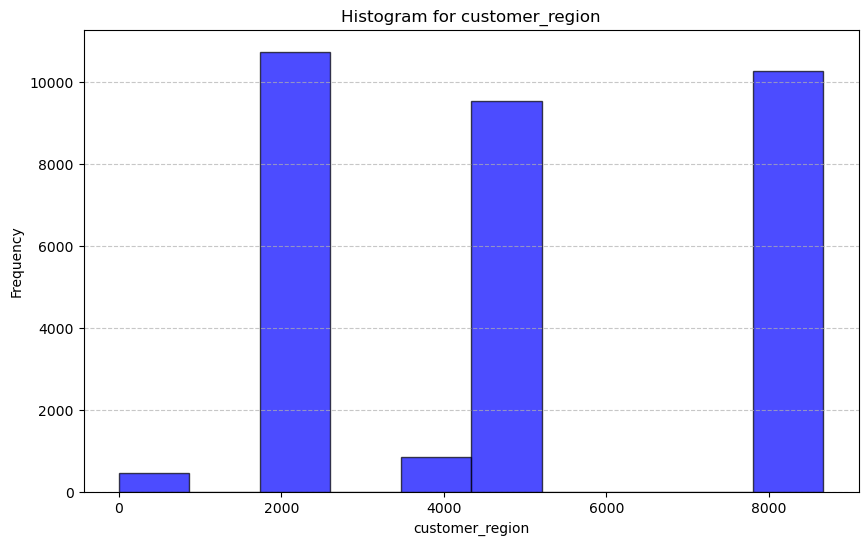

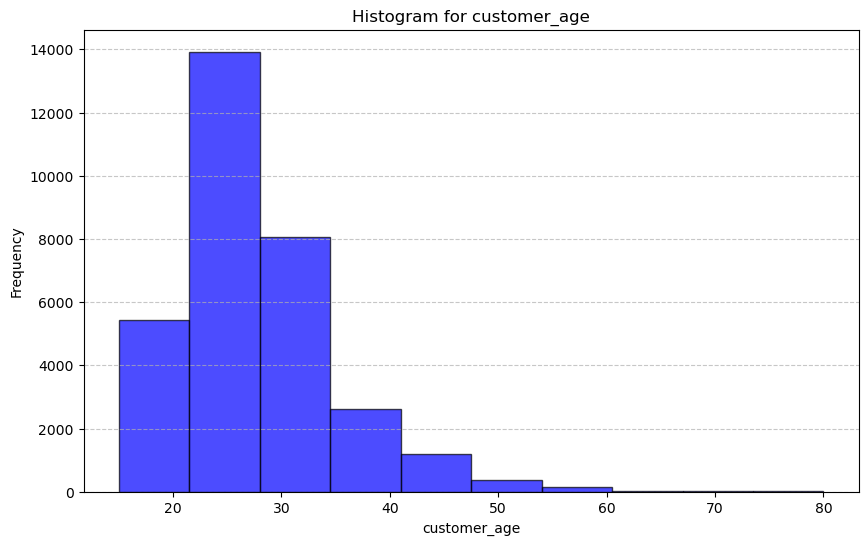

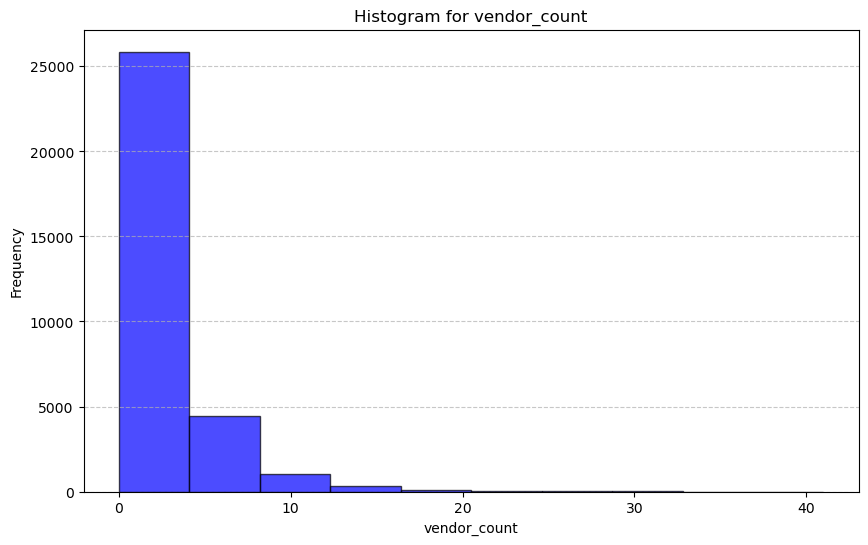

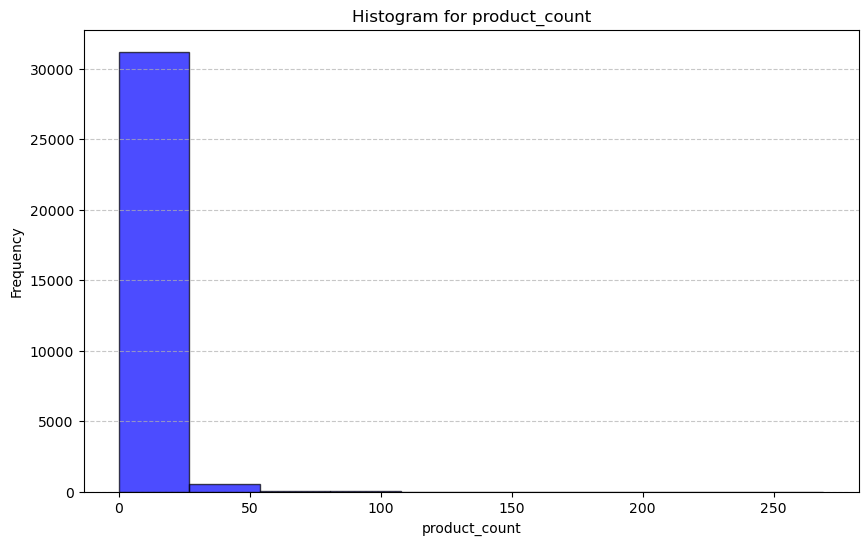

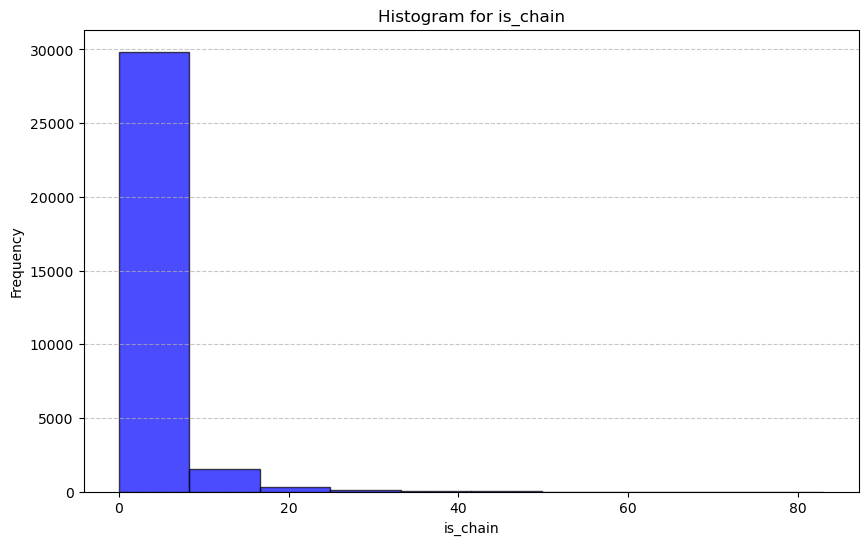

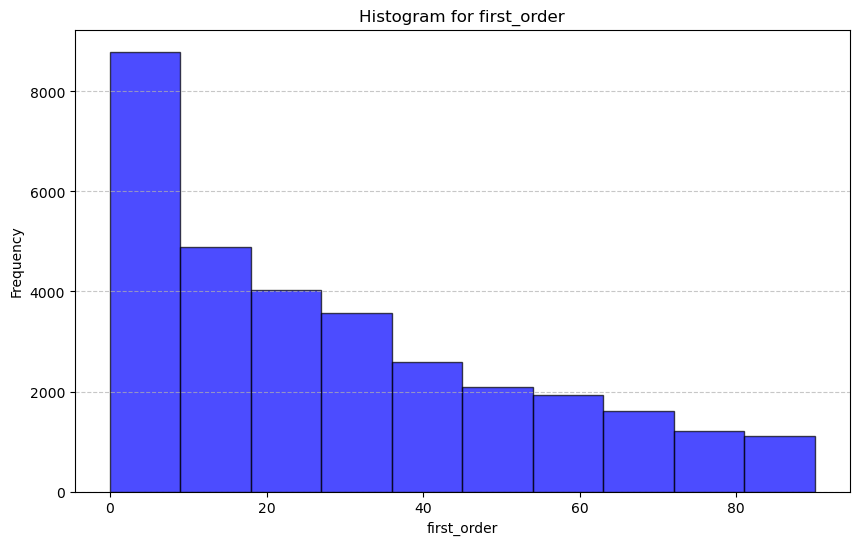

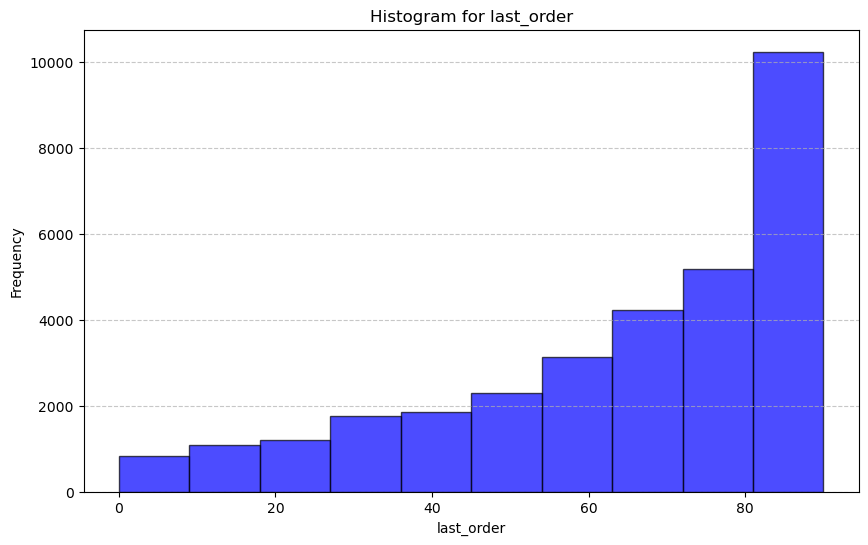

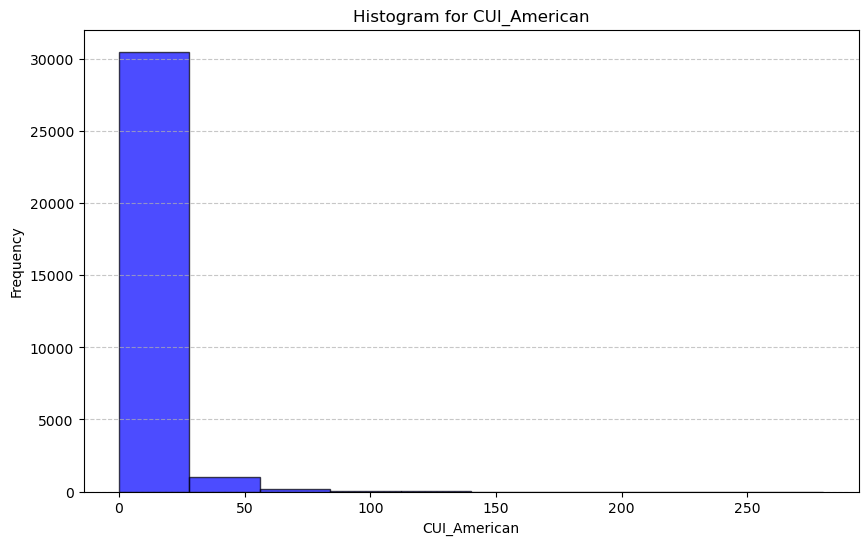

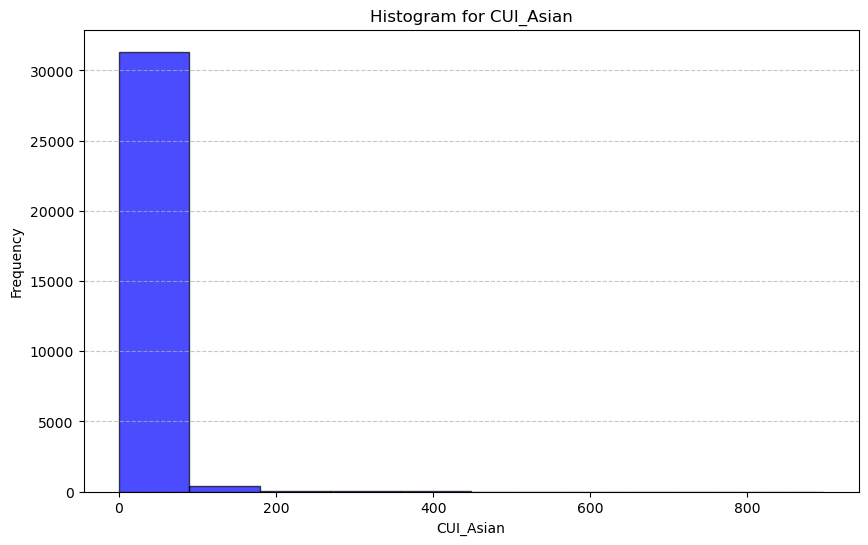

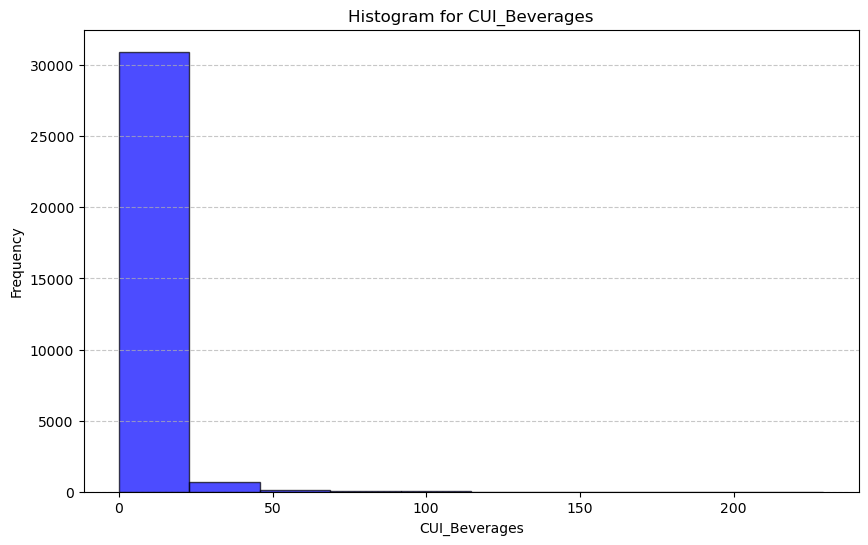

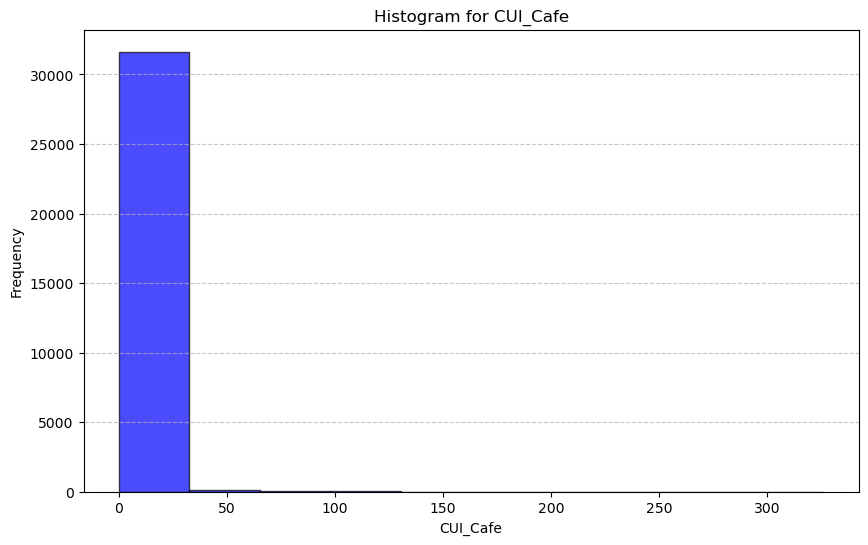

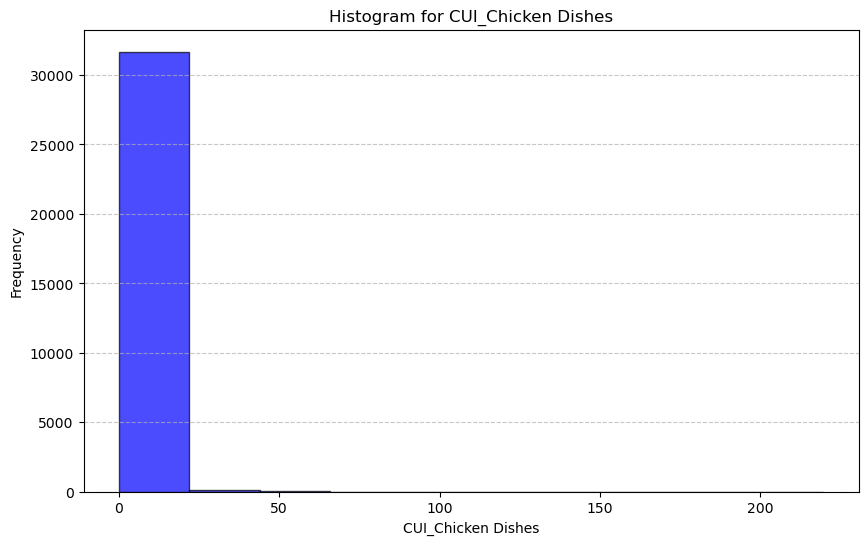

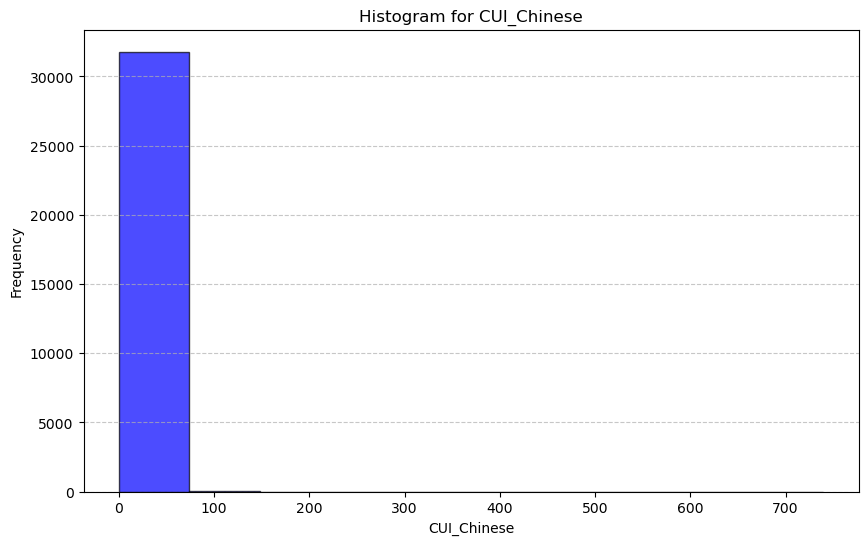

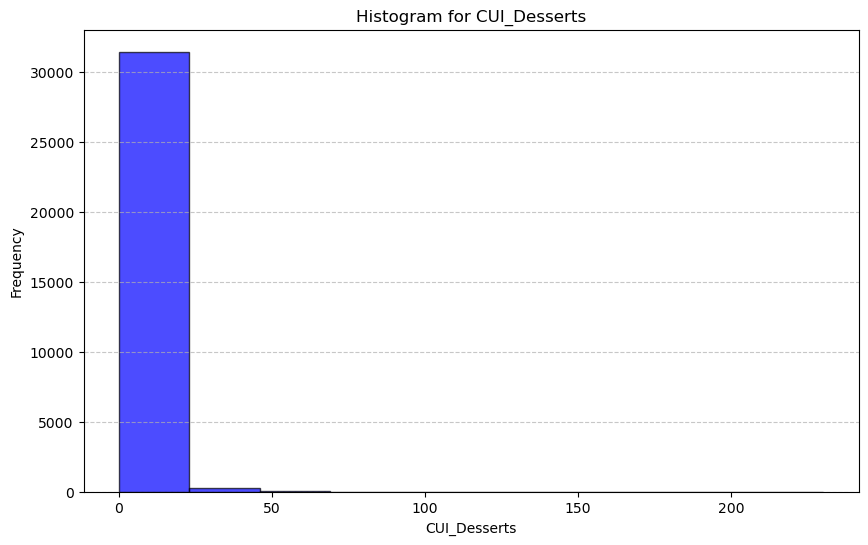

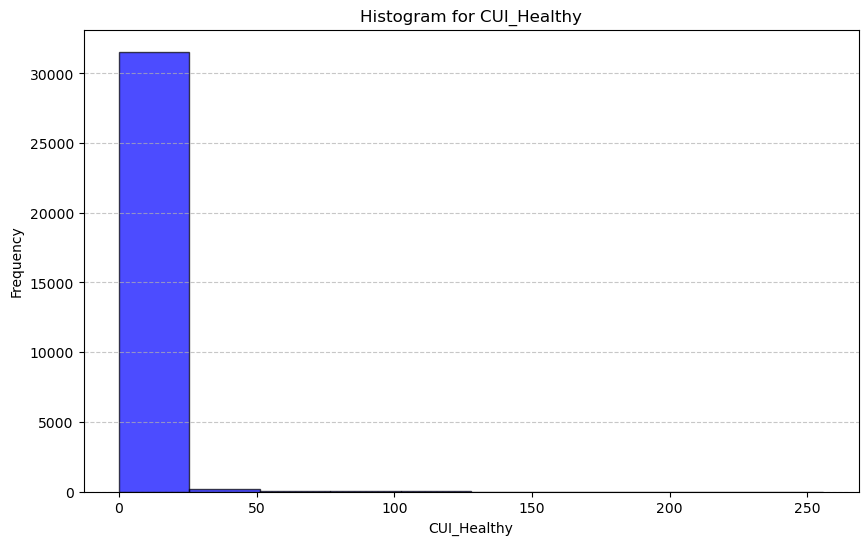

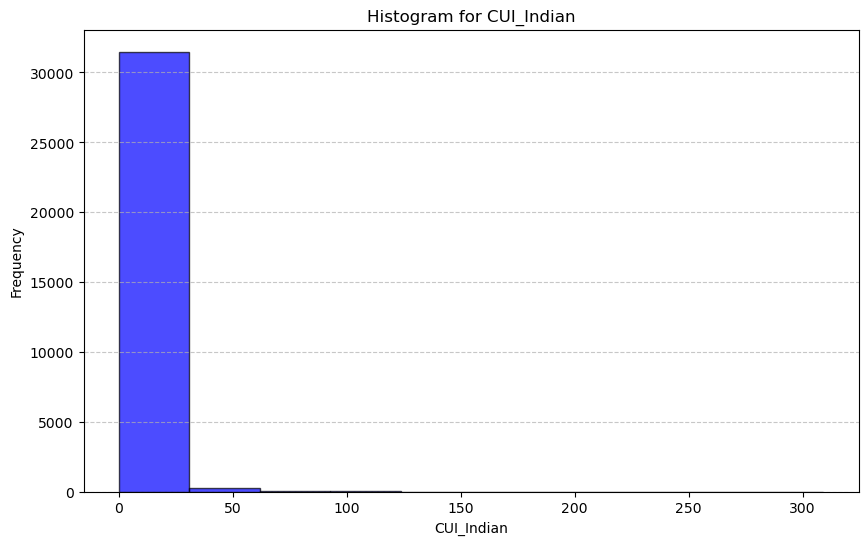

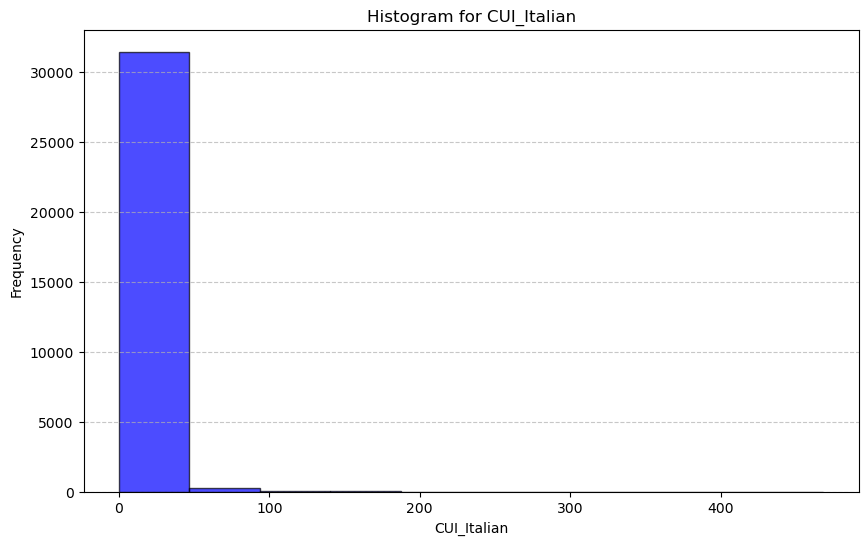

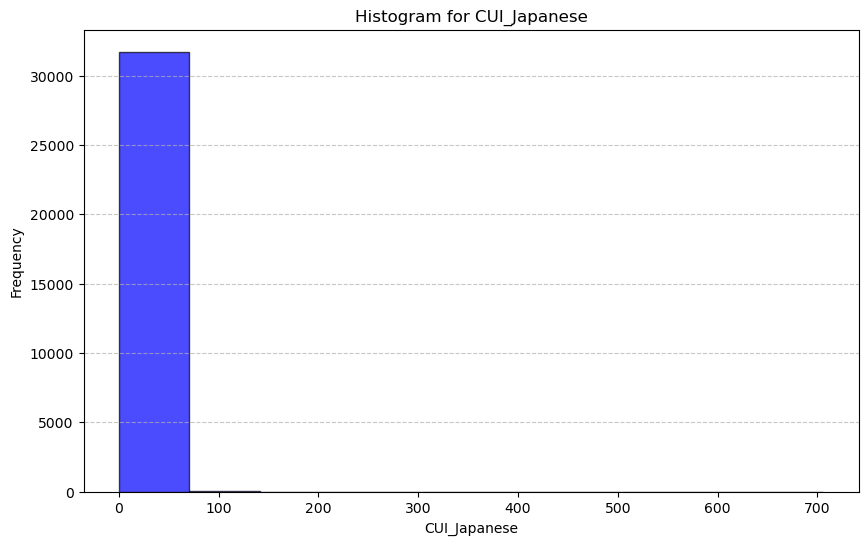

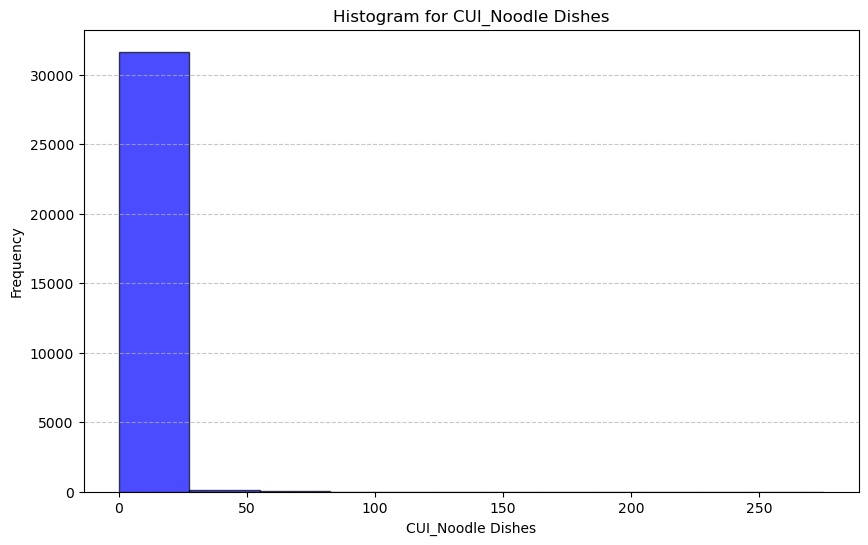

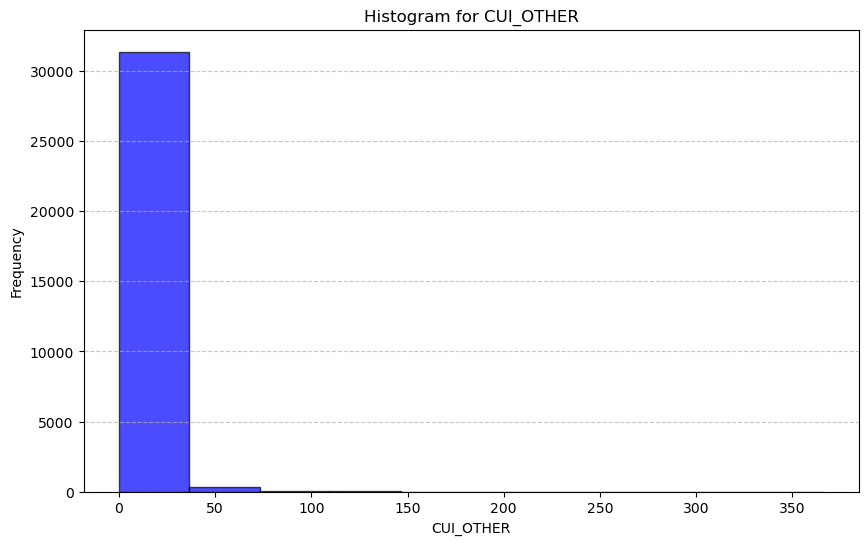

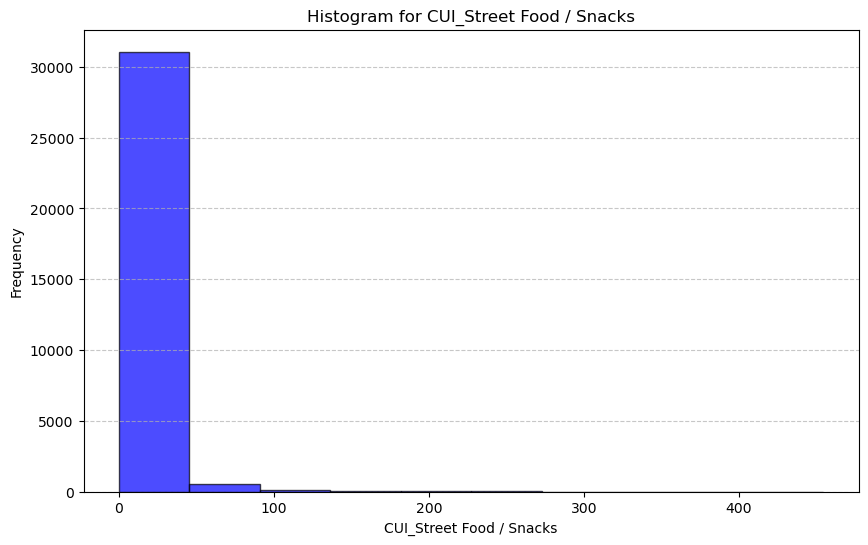

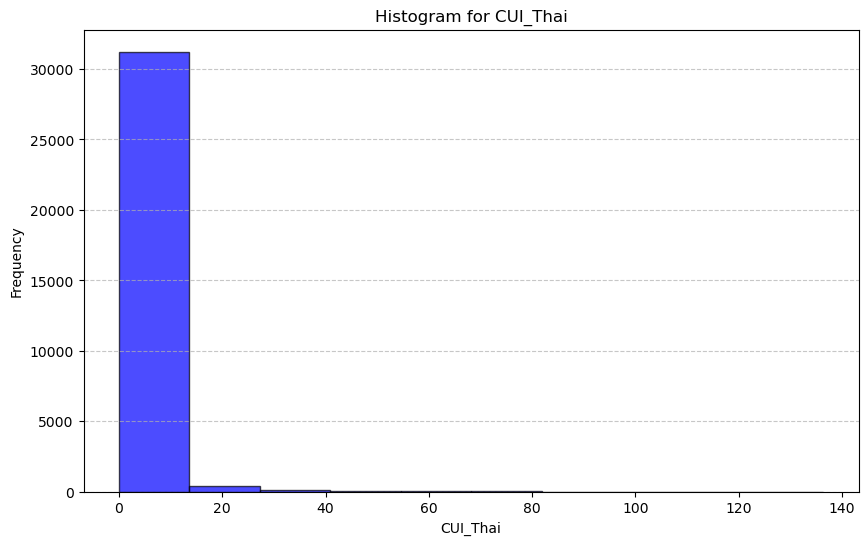

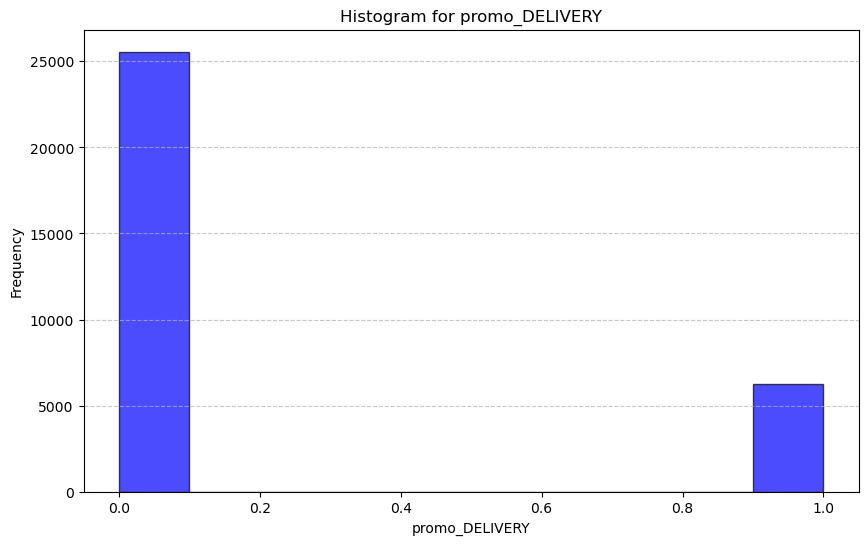

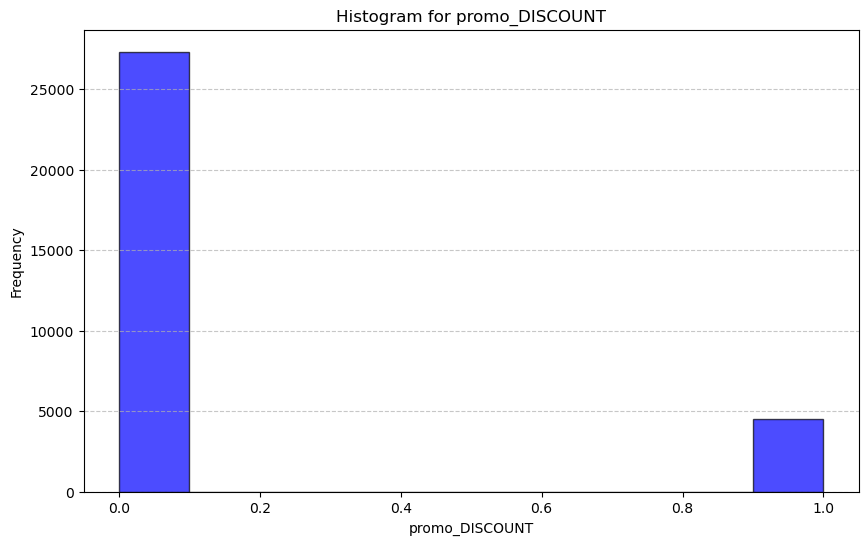

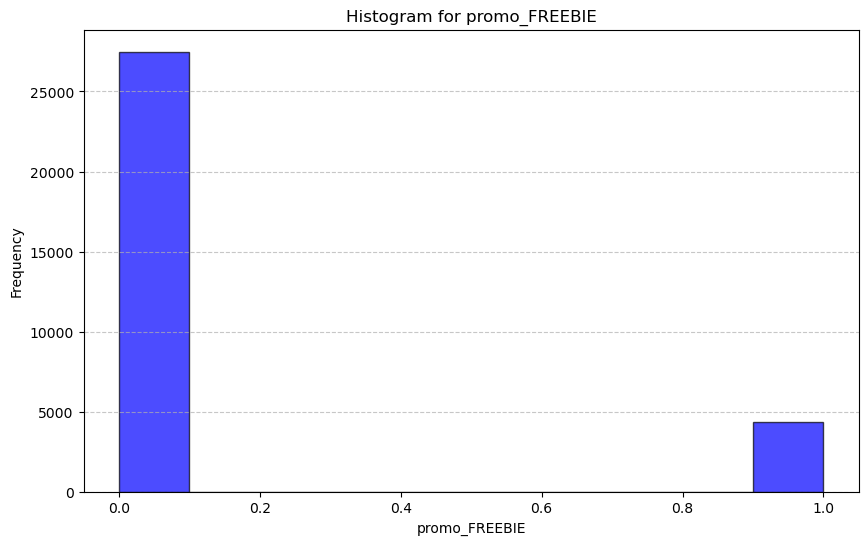

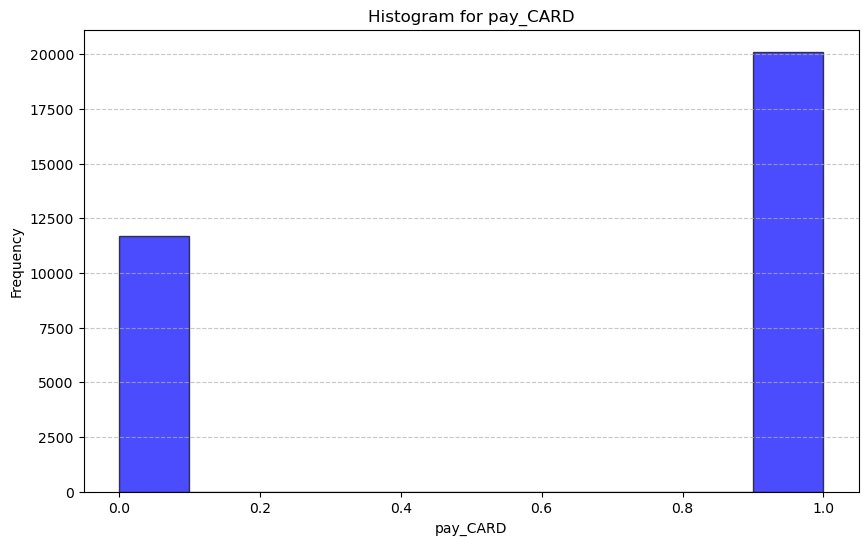

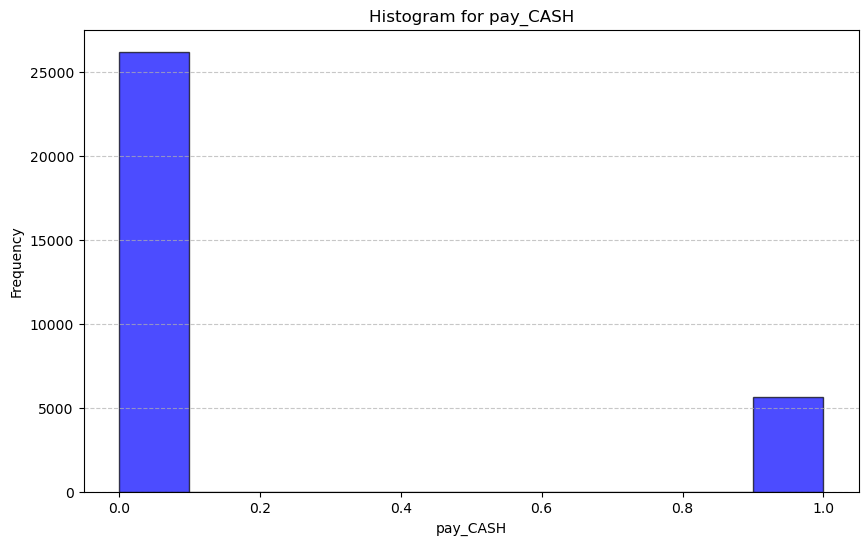

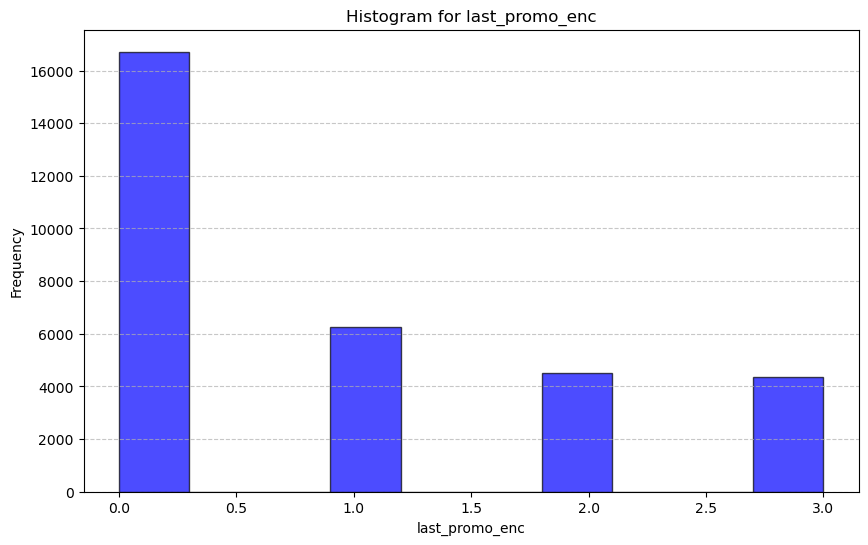

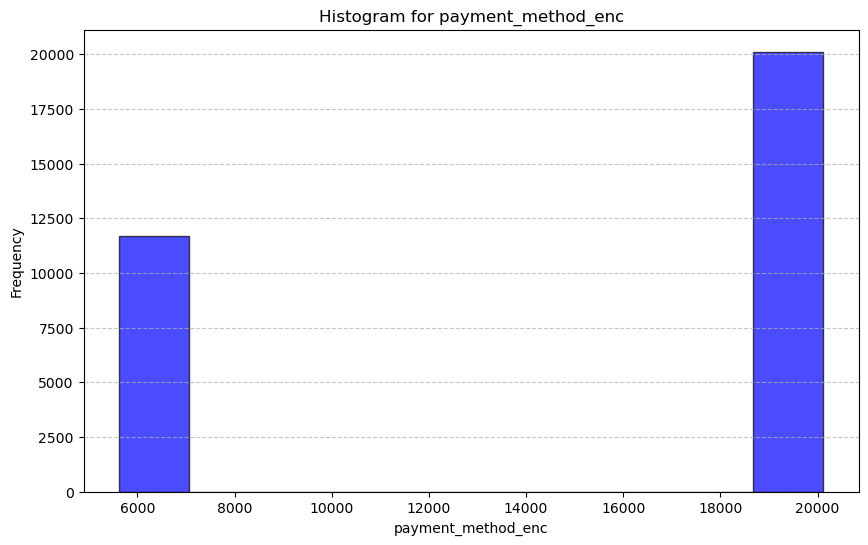

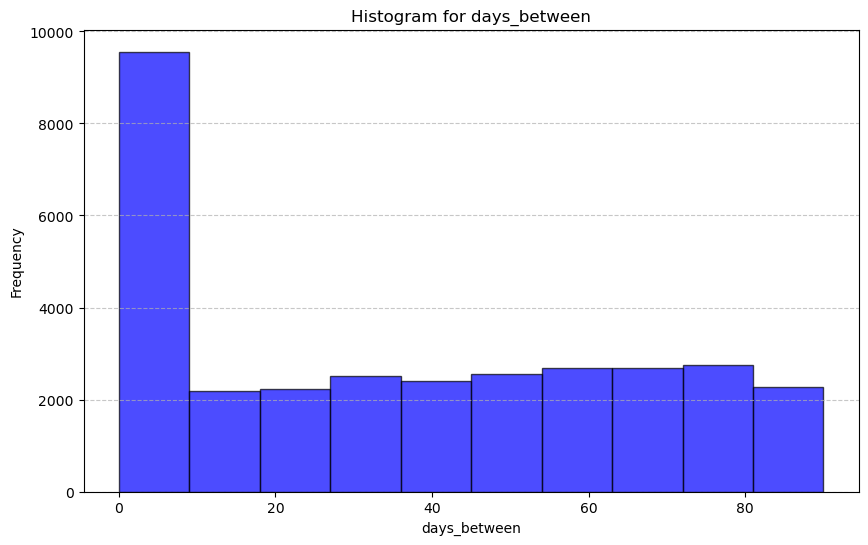

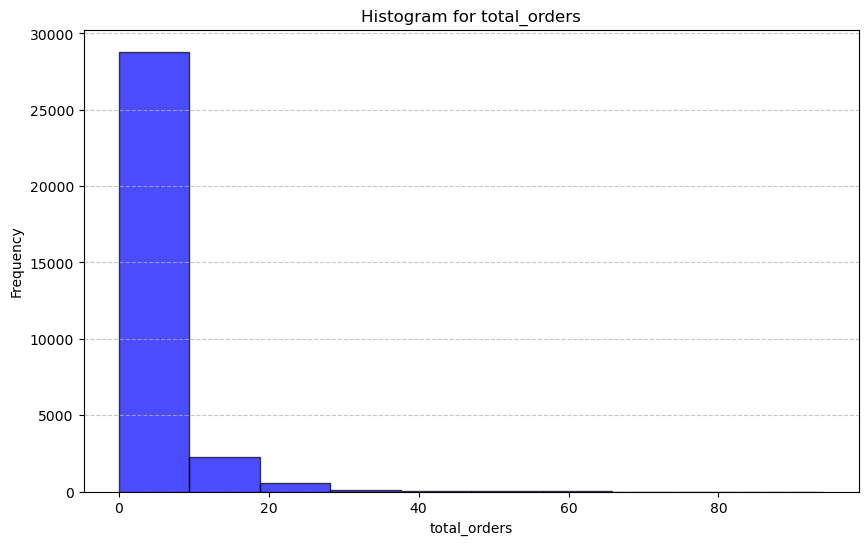

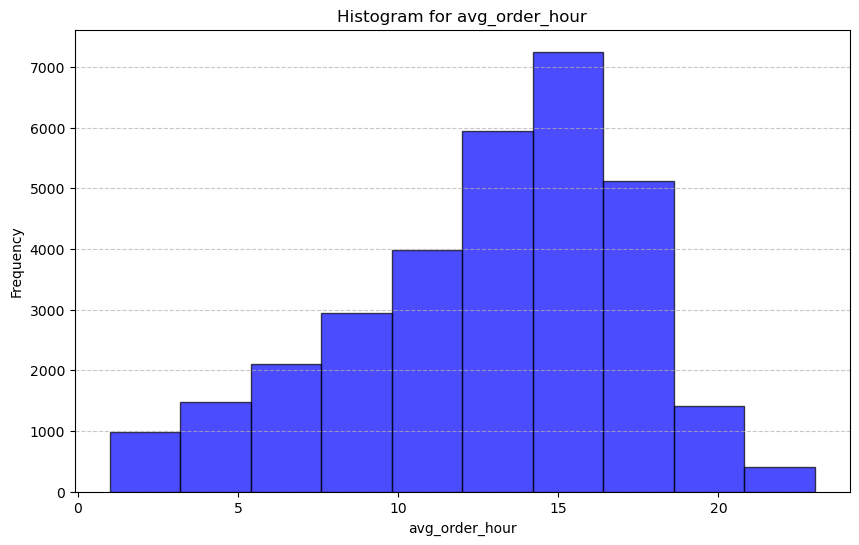

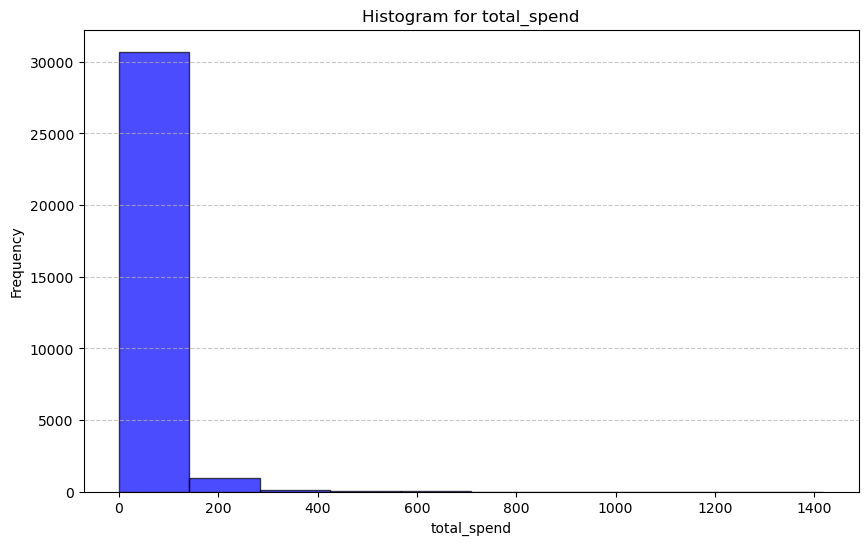

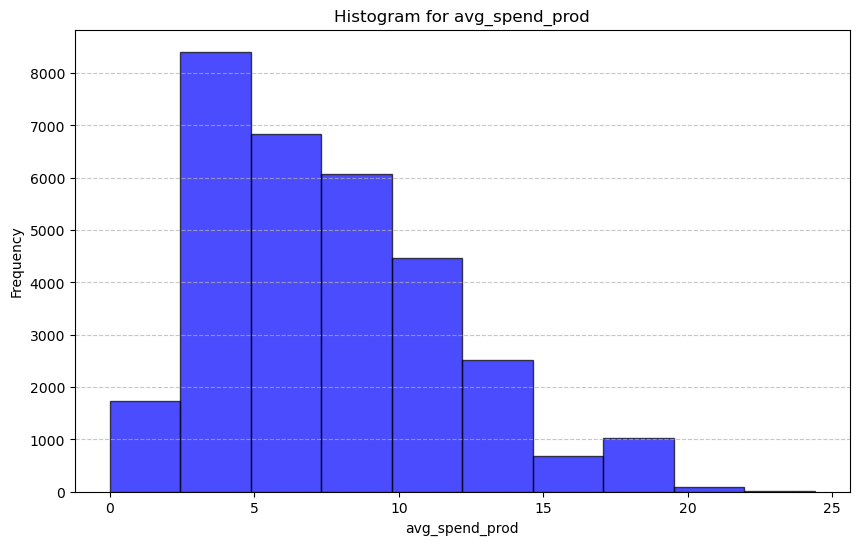

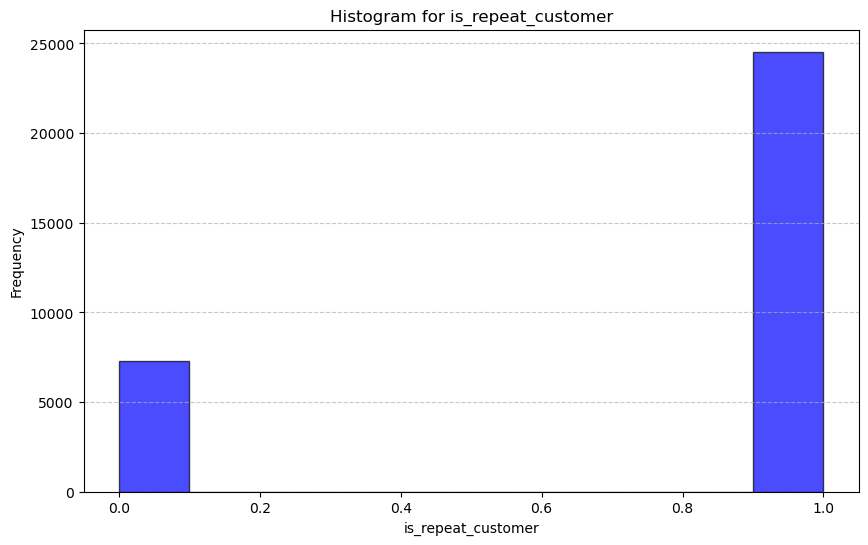

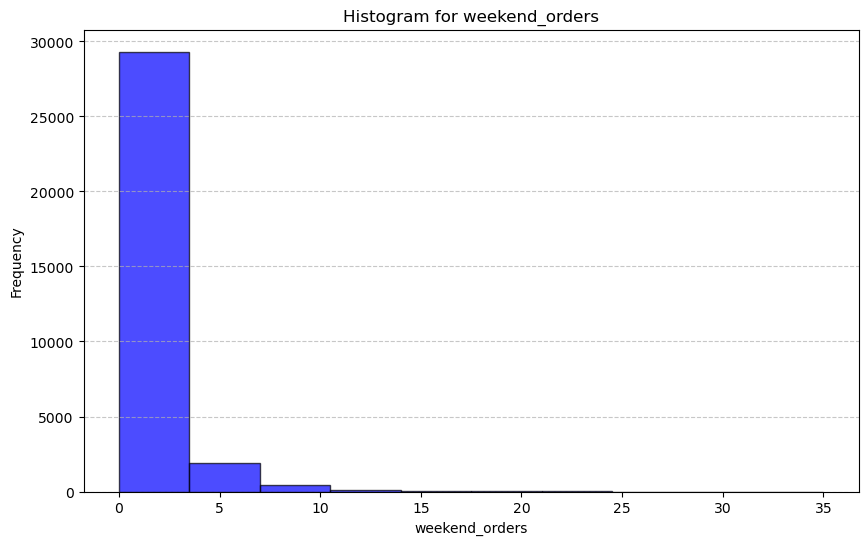

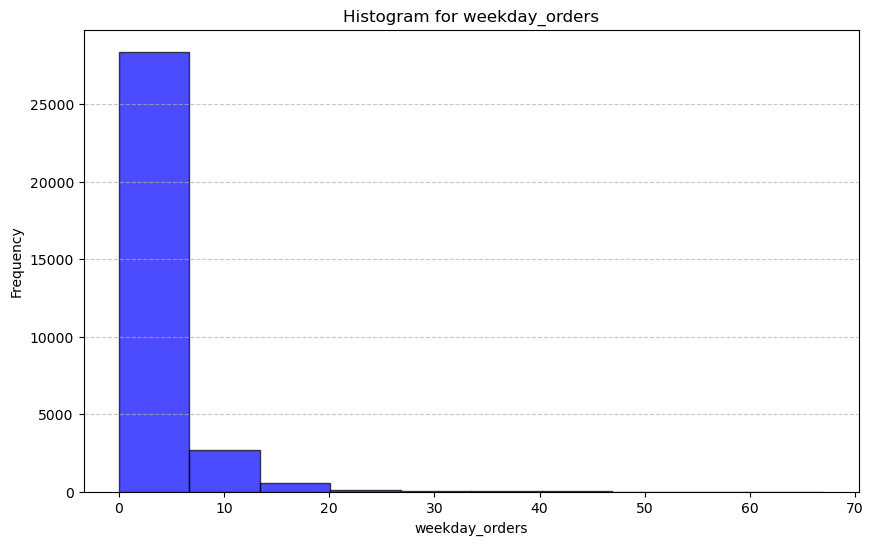

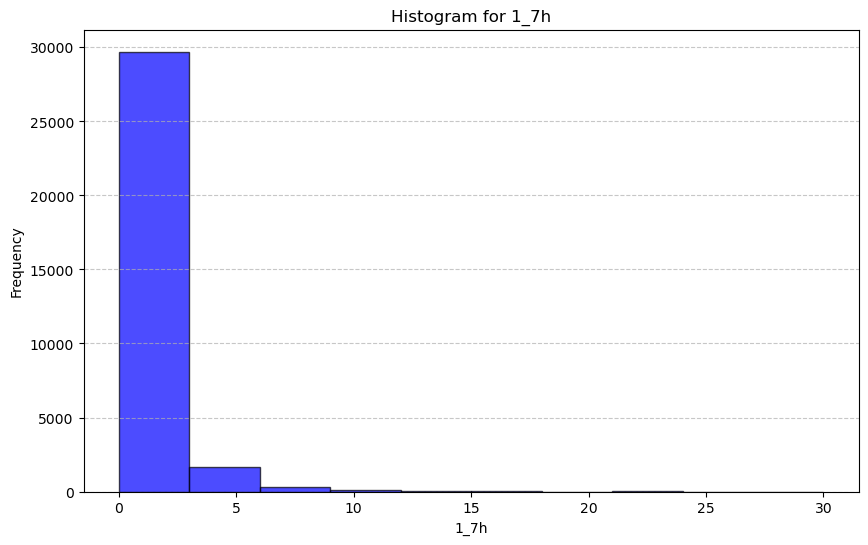

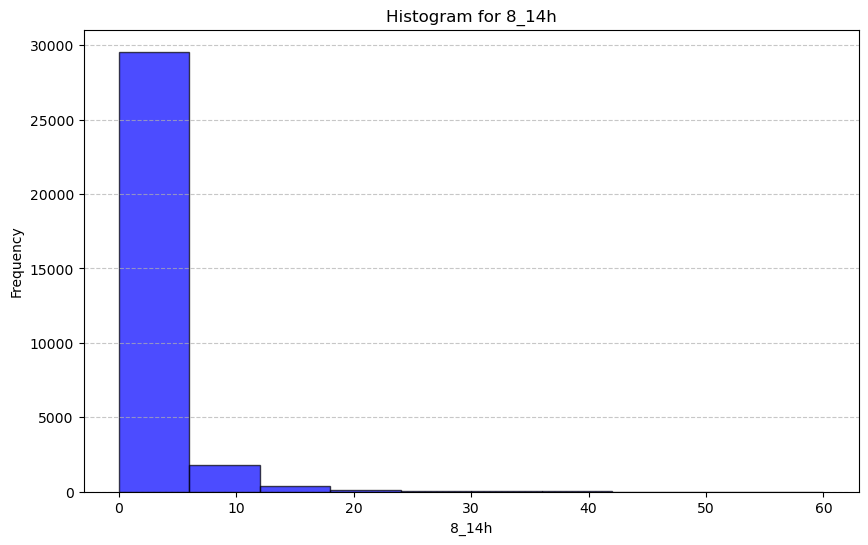

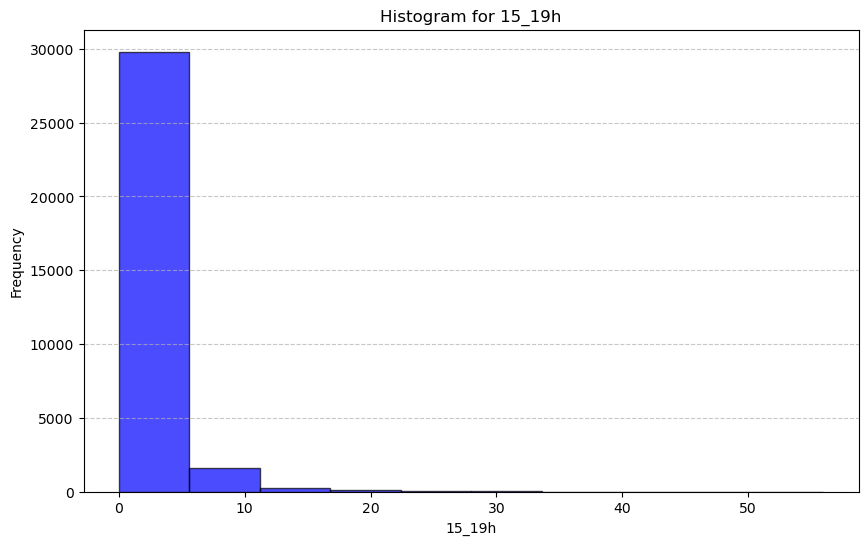

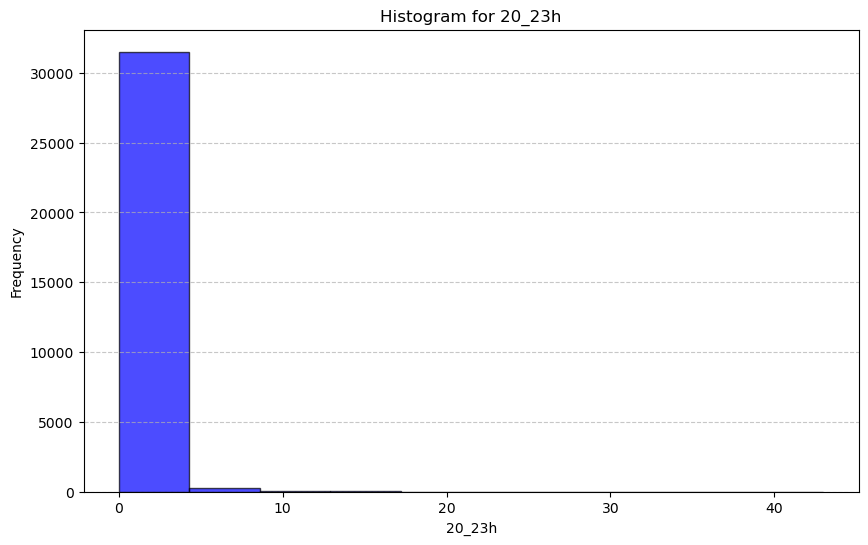

In [9]:
plot_histograms(data)

In [7]:
data.select_dtypes(include='number')

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,avg_order_hour,total_spend,avg_spend_prod,is_repeat_customer,weekend_orders,weekday_orders,1_7h,8_14h,15_19h,20_23h
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0,1,0.00,0.00,0.00,...,18.0,28.88,5.776,1,2,0,0,0,2,0
5d272b9dcb,8670,17.0,2,2,2,0,1,12.82,6.39,0.00,...,10.5,19.21,9.605,1,2,0,0,2,0,0
f6d1b2ba63,4660,38.0,1,2,2,0,1,9.20,0.00,0.00,...,10.0,9.20,4.600,1,2,0,0,2,0,0
180c632ed8,4660,26.0,2,3,1,0,2,0.00,13.70,0.00,...,12.5,31.56,10.520,1,1,1,0,2,0,0
4eb37a6705,4660,20.0,2,5,0,0,2,14.57,40.87,0.00,...,8.5,55.44,11.088,1,1,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,0,0,0.00,0.00,18.04,...,13.0,18.04,18.040,0,1,0,0,1,0,0
f6b6709018,8670,26.0,1,1,0,0,0,18.04,0.00,0.00,...,16.0,18.04,18.040,0,1,0,0,0,1,0
f74ad8ce3f,8670,24.0,1,1,1,0,0,0.00,0.00,0.00,...,5.0,17.79,17.790,0,1,0,1,0,0,0


<br>

# Feature Selection

In [46]:
promo_columns = ['promo_DELIVERY', 'promo_DISCOUNT', 'promo_FREEBIE']
enc_columns = [col_name for col_name in data.columns if 'enc' in col_name] + ['is_repeat_customer']

In [48]:
data_num = data.select_dtypes(include=np.number).set_index(data.index)
data_num.drop(promo_columns + enc_columns, axis = 1, inplace = True)

data_cat = data.select_dtypes(exclude=np.number).set_index(data.index)
data_cat[promo_columns + enc_columns] = data[promo_columns + enc_columns]

## Univariate variables

Here, we are going to check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.

In [53]:
data_num.var().sort_values()

pay_CASH                    1.453799e-01
pay_CARD                    2.325526e-01
20_23h                      9.758113e-01
1_7h                        1.950721e+00
weekend_orders              3.147892e+00
15_19h                      7.013484e+00
vendor_count                7.684597e+00
8_14h                       8.440045e+00
CUI_Chicken Dishes          1.339565e+01
weekday_orders              1.420943e+01
is_chain                    1.582394e+01
avg_spend_prod              1.663021e+01
avg_order_hour              1.950604e+01
CUI_Thai                    1.967208e+01
CUI_Noodle Dishes           2.061504e+01
total_orders                2.585679e+01
CUI_Desserts                2.763875e+01
CUI_Healthy                 3.405815e+01
CUI_Cafe                    4.138125e+01
product_count               4.840689e+01
customer_age                5.020333e+01
CUI_Indian                  5.540152e+01
CUI_Chinese                 6.717729e+01
CUI_Beverages               7.175260e+01
CUI_OTHER       

None of our variables have a variance of zero, so we do not drop any of them.

## Spearman Correlation

After, we decided to check once more the correlation between our features to conclude which variables are redundant and can be excluded.

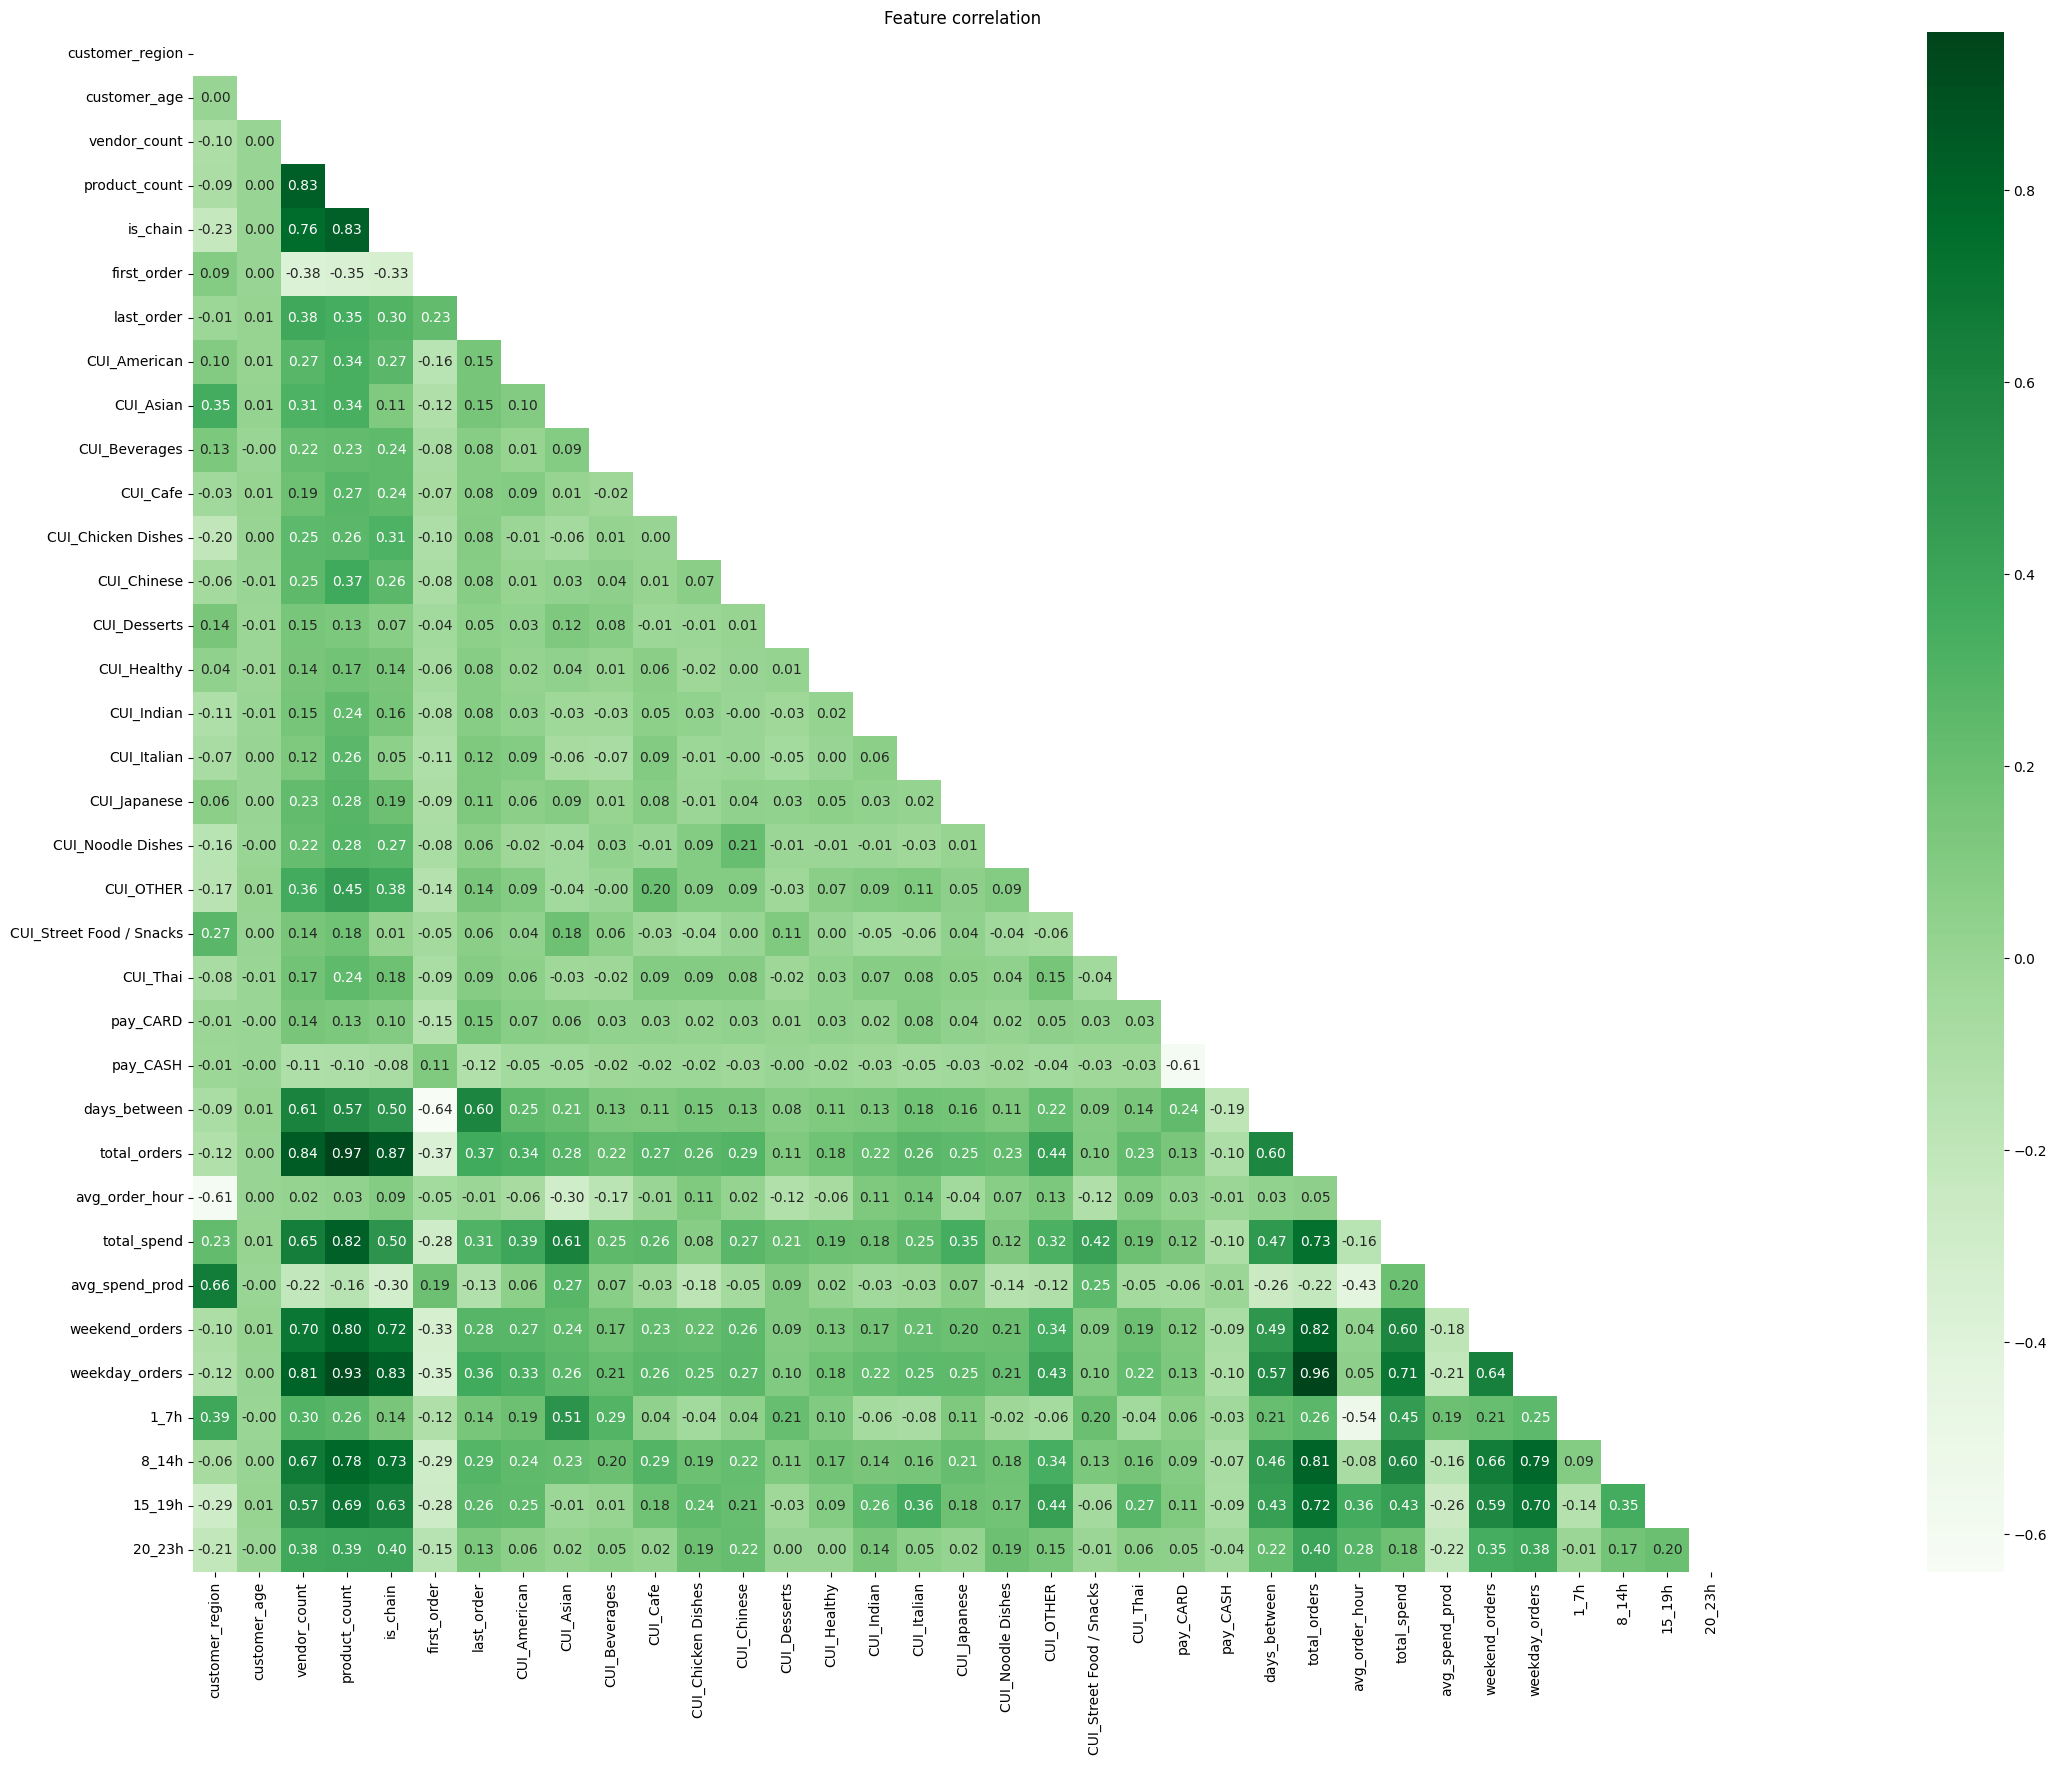

In [55]:
corr = data_num.corr(method="pearson")

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(50, 20))

sns.heatmap(data=corr, annot=True, mask=mask, cmap='Greens', fmt=".2f", square=True)

plt.title('Feature correlation')

plt.show()

TO IMPROVE

**Features to Potentially Exclude:**
1. `customer_region`
2. `order_hour`

## Conclusions from Feature Correlation Heatmap

**Strong Positive Correlations:**
* **Customer Age and Total Orders:** Older customers tend to order more frequently.
* **Customer Gender and Food Preferences:** There are correlations between gender and specific food category preferences.
* **Payment Method and Order Frequency:** Card payments are associated with higher order frequencies.
* **Order Frequency and Total Spend:** More frequent orders lead to higher total spending.

**Negative Correlations:**
* **Customer Age and Average Order Value:** Younger customers tend to spend more per order.
* **Customer Gender and Food Preferences:** Some food categories are associated with specific genders.

**Weak Correlations:**
* **Customer Region and Order Patterns:** Little correlation between region and order behavior.
* **Order Hour and Food Preferences:** Limited correlation between order time and food choices.

**Additional Observations:**
* The heatmap reveals a complex network of correlations between features.
* Underlying factors might drive some of these correlations.
* Further analysis is necessary to understand causal relationships.

**Potential Business Insights:**
* **Targeted Marketing:** Segment customers based on age, gender, and preferences for tailored campaigns.
* **Product Optimization:** Analyze food category correlations to optimize product offerings.
* **Enhanced Customer Experience:** Leverage insights from payment and order frequency to improve customer experience.
* **Understanding Customer Behavior:** Analyze order hour and food preference correlations to optimize operations.